In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import datetime as dt
import matplotlib.ticker as ticker

# 1. Global methane levels from 2002

# 1.1 Compute methane climatology for each month, and plot your results in 12 panels.

In [2]:
# Read nc files
Methane = xr.open_dataset("200301_202006-C3S-L3_GHG-PRODUCTS-OBS4MIPS-MERGED-v4.3.nc", engine="netcdf4")
Methane

<xarray.Dataset>
Dimensions:                  (time: 210, bnds: 2, lat: 36, lon: 72, pressure: 10)
Coordinates:
  * time                     (time) datetime64[ns] 2003-01-16T12:00:00 ... 20...
  * lat                      (lat) float64 -87.5 -82.5 -77.5 ... 77.5 82.5 87.5
  * lon                      (lon) float64 -177.5 -172.5 -167.5 ... 172.5 177.5
Dimensions without coordinates: bnds, pressure
Data variables:
    time_bnds                (time, bnds) datetime64[ns] ...
    lat_bnds                 (lat, bnds) float64 ...
    lon_bnds                 (lon, bnds) float64 ...
    pre                      (pressure) float64 ...
    pre_bnds                 (pressure, bnds) float64 ...
    land_fraction            (lat, lon) float64 ...
    xch4                     (time, lat, lon) float32 ...
    xch4_nobs                (time, lat, lon) float64 ...
    xch4_stderr              (time, lat, lon) float32 ...
    xch4_stddev              (time, lat, lon) float32 ...
    column_averaging_kernel  (time, pressure, lat, lon) float32 ...
    vmr_profile_ch4_apriori  (time, pressure, lat, lon) float32 ...
Attributes: (12/28)
    activity_id:            obs4MIPs
    comment:                Since long time, climate modellers use ensemble a...
    contact:                Maximilian Reuter (maximilian.reuter@iup.physik.u...
    Conventions:            CF-1.7 ODS-2.1
    creation_date:          2021-02-05T09:48:47Z
    data_specs_version:     2.1.0
    ...                     ...
    source_version_number:  v4.3
    title:                  C3S XCH4 v4.3
    tracking_id:            892d184a-7b35-4bba-836a-94b9cfeb360e
    variable_id:            xch4
    variant_info:           Best Estimate
    variant_label:          BE

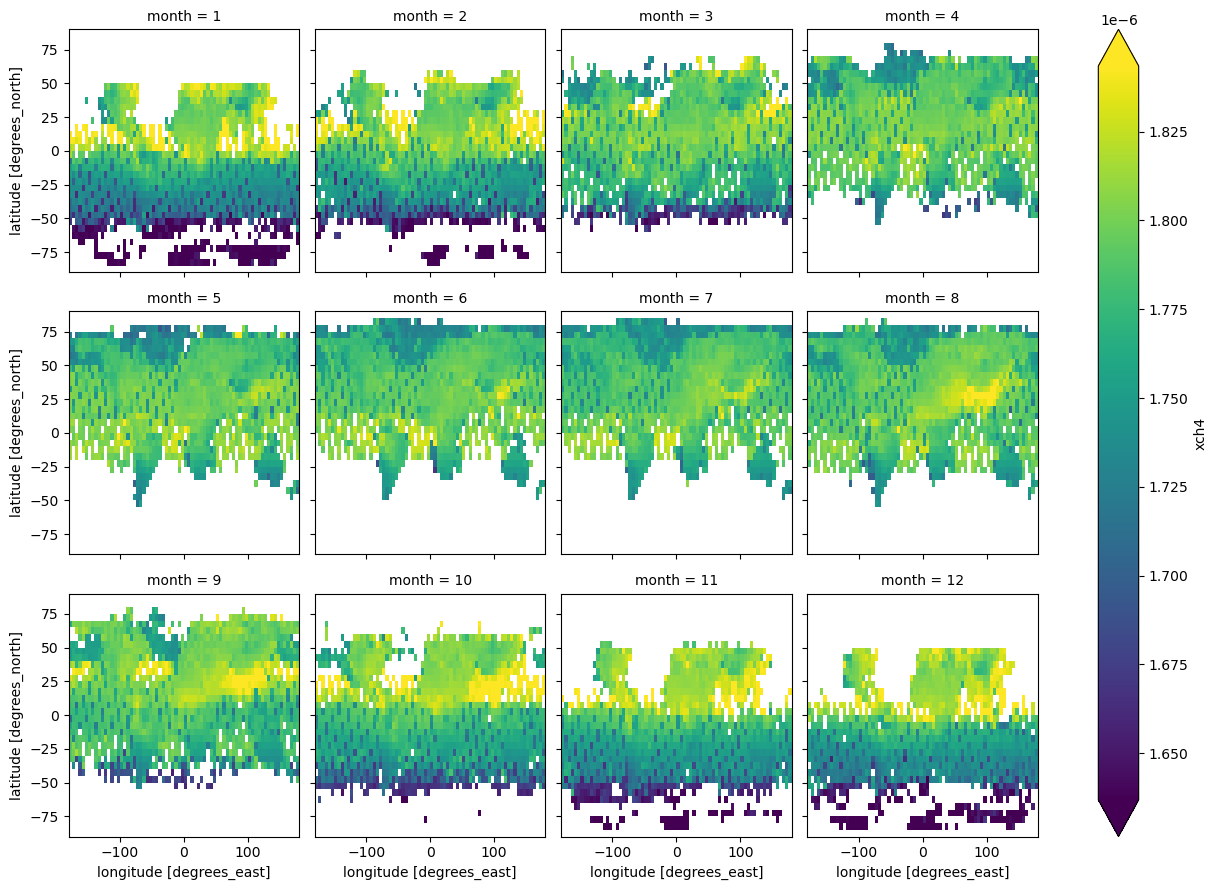

In [3]:
# Calculate the climatology 
Methane_Mclim = Methane.xch4.groupby(Methane.time.dt.month).mean()
Methane_Mclim.plot(col="month", col_wrap=4,robust=True)

# 1.2 Plot globally-averaged methane from 2003-01 to 2020-06 as a time series. Describe your results. Check your plot with this one.

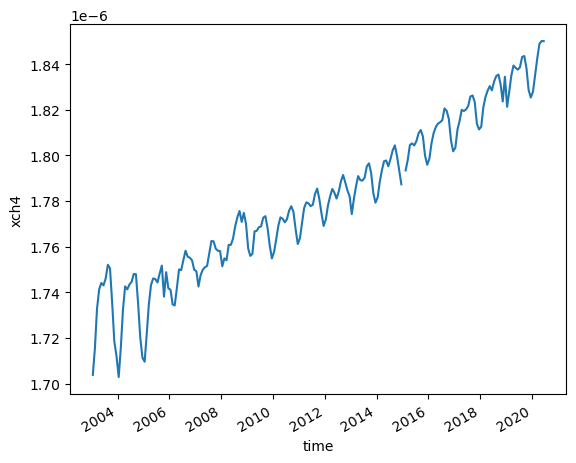

In [4]:
# globally-averaged methane
Methane.xch4.mean(dim=['lat', 'lon']).plot()

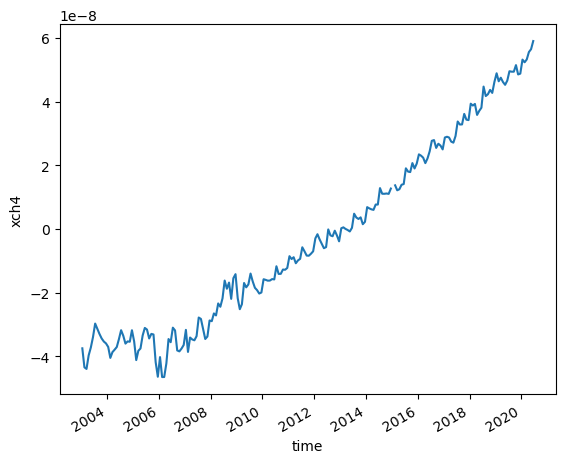

In [5]:
# deseasonalized methane levels

# Group data by month
group_data = Methane.xch4.groupby('time.month')

# Apply mean to grouped data, and then compute the anomaly 
xch4_anom = group_data - group_data.mean(dim='time')
# xch4_anom 
xch4_anom.mean(dim=['lat', 'lon']).plot()

# 1.3 Plot deseasonalized methane levels at point [15°S, 150°W] from 2003-01 to 2020-06 as a time series. Describe your results.

D:\ANACONDA\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
D:\ANACONDA\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


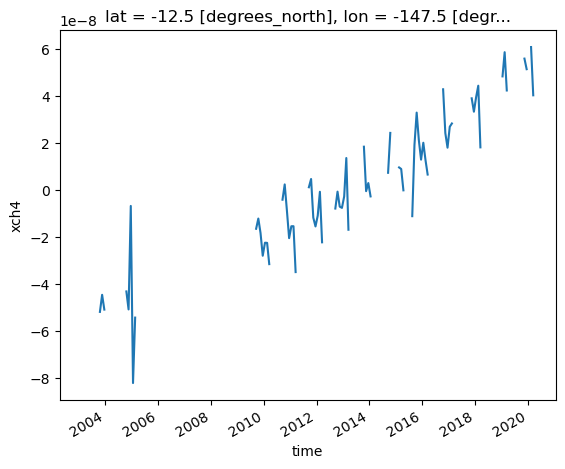

In [6]:
# Remove the seasonal cycle

# methane levels showed as anomalies
xch4_anom.sel(lon = -150, lat = -15,method = 'nearest').plot()

# 2. Niño 3.4 index

In [7]:
# Read nc files
SST = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
SST

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [8]:
# two regions one for better view and one for Niño 3.4 region.
SST_Niño3_4_Region_Show = SST.sel(lon = slice(100,360-60),      lat = slice(-60,60) )
SST_Niño3_4_Region      = SST.sel(lon = slice(360-170,360-120), lat = slice(-5,5)   )

# 2.1 Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.

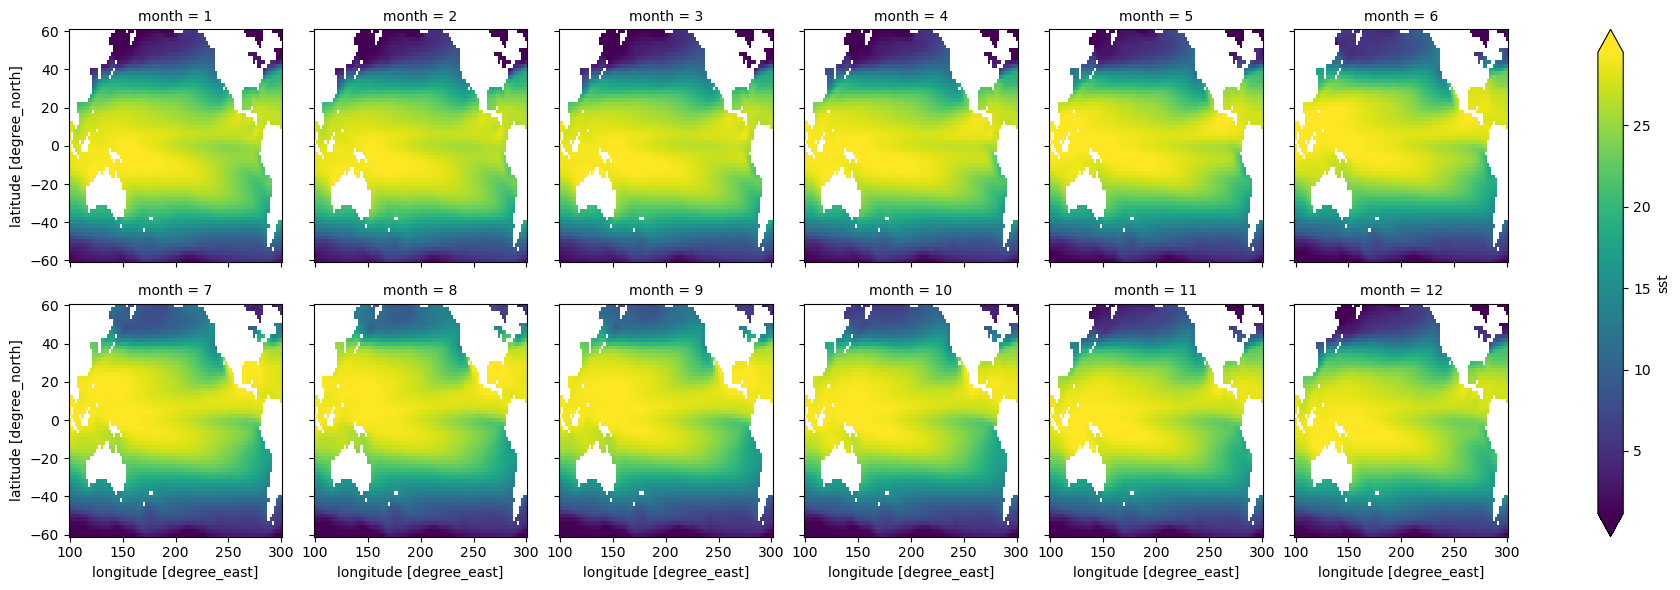

In [9]:
# Calculate the climatology 
SST_Niño3_4_Region_Show.sst.groupby('time.month').mean(dim='time').plot(col="month", col_wrap=6,robust=True)

# This region is to show a better view of Niño 3.4 region

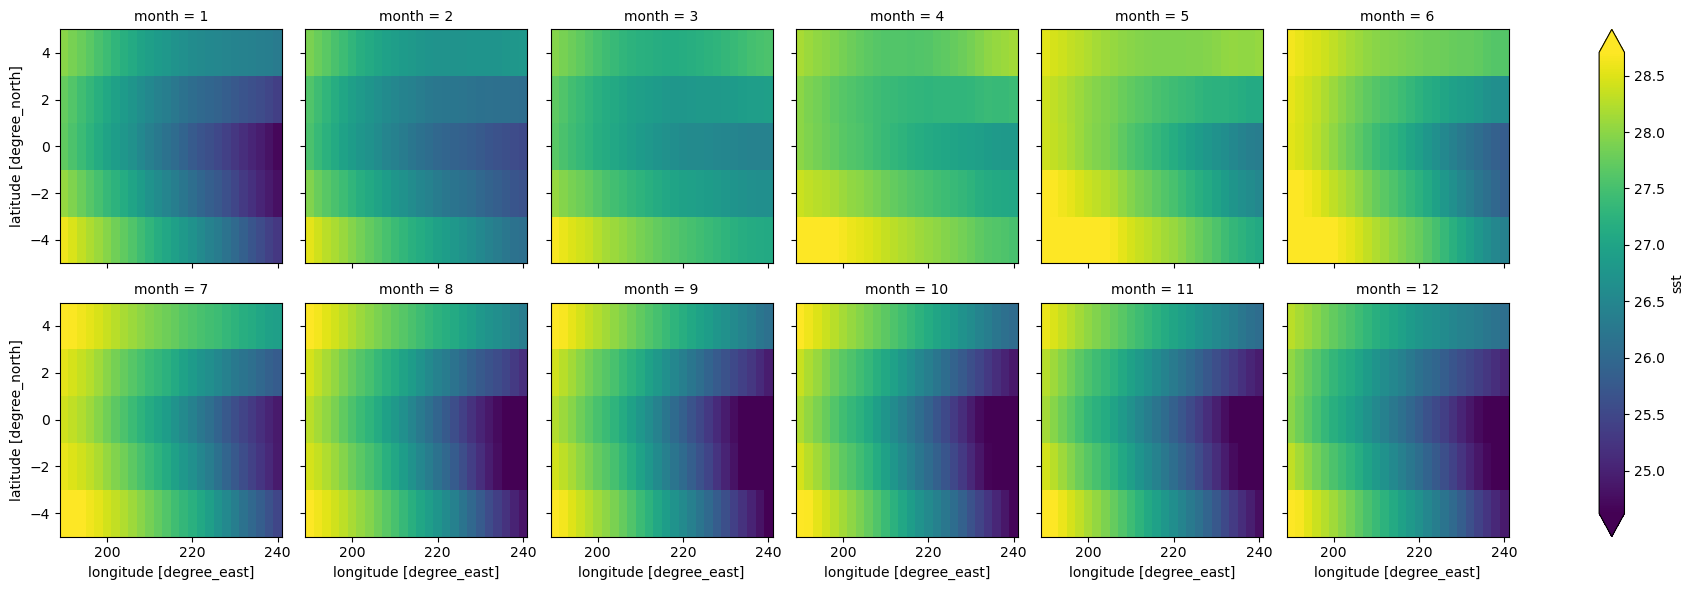

In [10]:
# This one is 
SST_Niño3_4_Region.sst.groupby('time.month').mean(dim='time').plot(col="month", col_wrap=6,robust=True)

In [11]:
# Group data by month
SST_groupby      = SST_Niño3_4_Region.sst.groupby('time.month')
#SST_groupby_Show = SST_Niño3_4_Region_Show.sst.groupby('time.month')

# Apply mean to grouped data, and then compute the anomaly 
SST_anom      = SST_groupby - SST_groupby.mean(dim='time')
#SST_anom_Show = SST_groupby_Show - SST_groupby_Show.mean(dim='time')

#
# SST_anom

# 2.2  Visualize the computed Niño 3.4. 

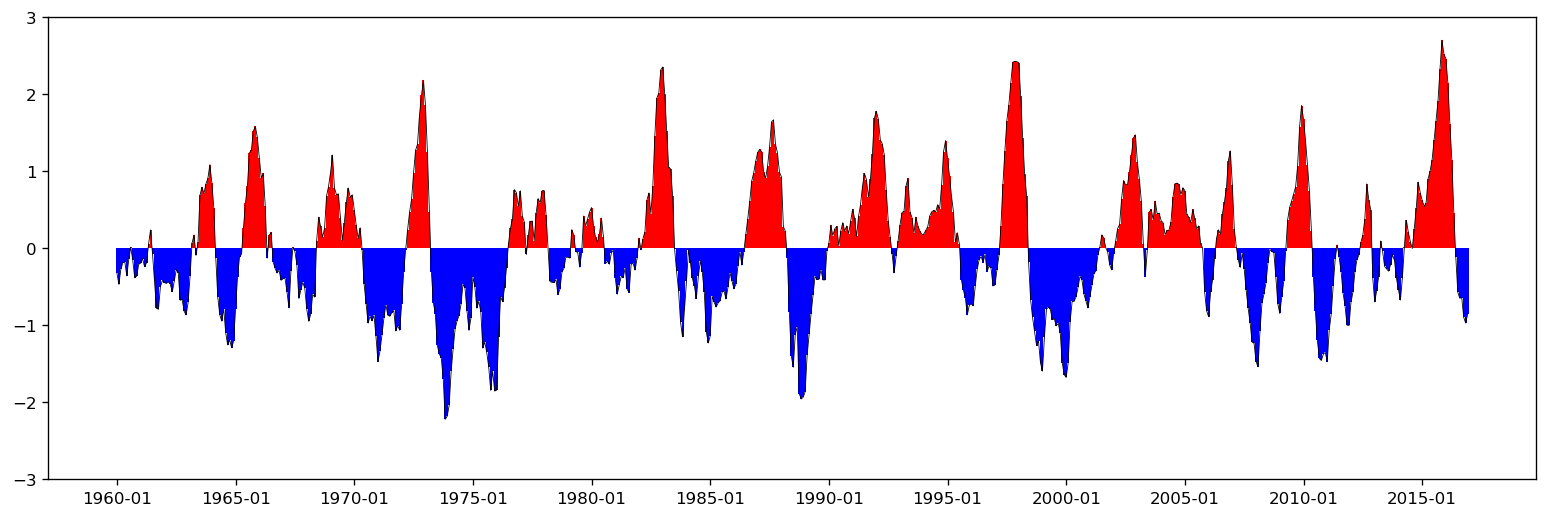

In [12]:
# Time
timeX = SST_anom.sel(time=slice('1960','2016')).mean(dim=['lat', 'lon']).time.dt.strftime('%Y-%m')

# Anomaly
heightH = SST_anom.sel(time=slice('1960','2016')).mean(dim=['lat', 'lon'])

# Draw plot
fig, ax = plt.subplots(1,1, figsize=(16,5), dpi=120)

# Red for positive blue for negative
colormat = np.where(heightH>0, 'r','b')

# line
ax.plot(timeX,heightH,'k-',linewidth=0.5 )

# bar plot
ax.bar(timeX,heightH,width = 1,color = colormat) # green dots

# ylim
ax.set_ylim(-3, 3)

# every five years
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=60))

# 3.Explore a netCDF dataset

In [13]:
# Open CSR Grace Data
GraceCSR = xr.open_dataset("CSR_GRACE_GRACE-FO_RL06_Mascons_all-corrections_v02.nc", engine="netcdf4")

# Open CSR Land Mask Data
GraceCSR_LandMask = xr.open_dataset("CSR_GRACE_GRACE-FO_RL06_Mascons_v02_LandMask.nc", engine="netcdf4")

In [14]:
GraceCSR

<xarray.Dataset>
Dimensions:        (time: 212, timebound: 2, lon: 1440, lat: 720)
Coordinates:
  * time           (time) float32 107.0 129.5 227.5 ... 7.502e+03 7.532e+03
  * lon            (lon) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * lat            (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
Dimensions without coordinates: timebound
Data variables:
    time_bounds    (time, timebound) float32 ...
    lwe_thickness  (time, lat, lon) float32 ...
Attributes: (12/58)
    Conventions:                CF-1.6, ACDD-1.3, ISO 8601
    filename:                   netcdf/CSR_GRACE_GRACE-FO_RL06_Mascons_all-co...
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    title:                      CSR GRACE and GRACE-FO MASCON RL06Mv2
    subtitle:                   GRACE/GRACE-FO Total water storage with all c...
    ...                         ...
    user_note_2:                The accelerometer on the GRACE-FO 2 spacecraf...
    user_note_3:                Ellipsoidal correction has been applied. The ...
    date_created:               2022-10-11T11:36:56Z
    variable:                   liquid water equivalent thickness
    label:                      RL06rc24cE
    Mask:                       Global

In [15]:
# Change the time dimention.

# Day.txt viewed by Arcmap and summarized by myself manually
day = pd.read_csv("day.txt",header = None)
time = pd.to_datetime(day[0]).to_numpy()

# time dimention changed
GraceCSR.coords['time'] = ('time',time)

In [16]:
# Add a new variable as land mask.
GraceCSR['island'] = GraceCSR_LandMask.LO_val
GraceCSR

<xarray.Dataset>
Dimensions:        (time: 212, timebound: 2, lon: 1440, lat: 720)
Coordinates:
  * time           (time) datetime64[ns] 2002-04-01 2002-05-01 ... 2022-08-01
  * lon            (lon) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9
  * lat            (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
Dimensions without coordinates: timebound
Data variables:
    time_bounds    (time, timebound) float32 94.0 120.0 ... 7.517e+03 7.548e+03
    lwe_thickness  (time, lat, lon) float32 ...
    island         (lat, lon) float32 ...
Attributes: (12/58)
    Conventions:                CF-1.6, ACDD-1.3, ISO 8601
    filename:                   netcdf/CSR_GRACE_GRACE-FO_RL06_Mascons_all-co...
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    title:                      CSR GRACE and GRACE-FO MASCON RL06Mv2
    subtitle:                   GRACE/GRACE-FO Total water storage with all c...
    ...                         ...
    user_note_2:                The accelerometer on the GRACE-FO 2 spacecraf...
    user_note_3:                Ellipsoidal correction has been applied. The ...
    date_created:               2022-10-11T11:36:56Z
    variable:                   liquid water equivalent thickness
    label:                      RL06rc24cE
    Mask:                       Global

# 3.1 Plot a time series of a certain variable with monthly seasonal cycle removed.

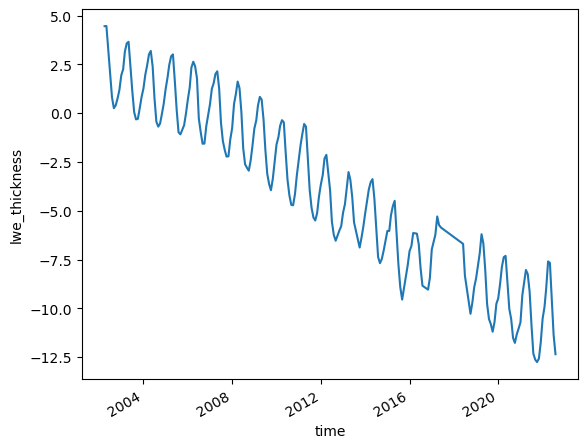

In [17]:
# Time series of lwe_thickness
GraceCSR.lwe_thickness.where(GraceCSR.island ==1).mean(dim = ['lat','lon']).plot()

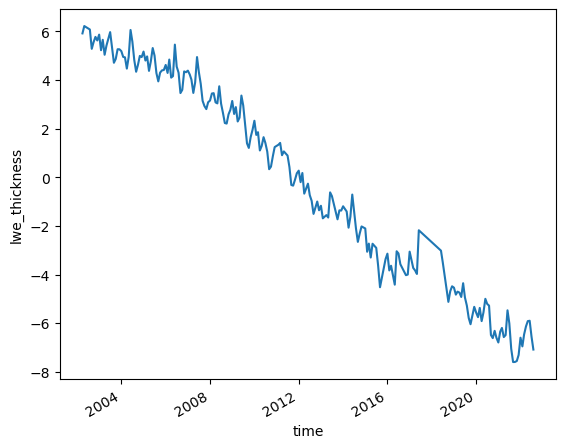

In [18]:
# with monthly seasonal cycle removed.

# Group data by month
group_data_CSR = GraceCSR.lwe_thickness.groupby('time.month')

# Apply mean to grouped data, and then compute the anomaly 
CSR_anom = group_data_CSR - group_data_CSR.mean(dim='time')

CSR_anom.where(GraceCSR.island ==1).mean(dim = ['lat','lon']).plot()

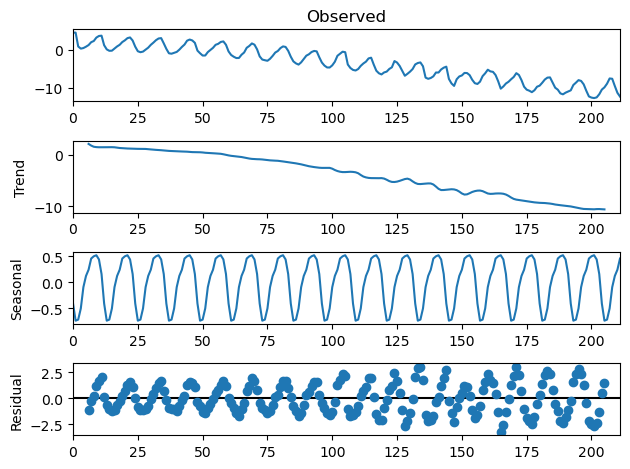

In [23]:
# Actually this is not true because the time series is not seriously continuous
decompose_data = seasonal_decompose(GraceCSR.lwe_thickness.where(GraceCSR.island ==1).mean(dim = ['lat','lon']), model="additive",period = 12)
decompose_data.plot(); 

# 3.2 Make at least 5 different plots using the dataset.

# 3.2.1

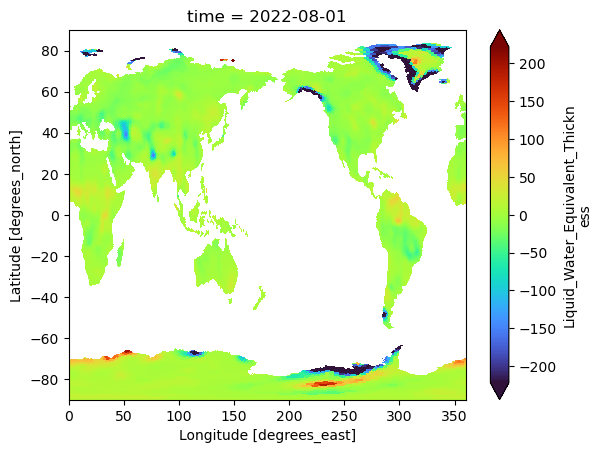

In [24]:
# Latest month for land 
GraceCSR.lwe_thickness.where(GraceCSR.island == 1).isel(time=-1).plot(robust = True,cmap='turbo')

# 3.2.2

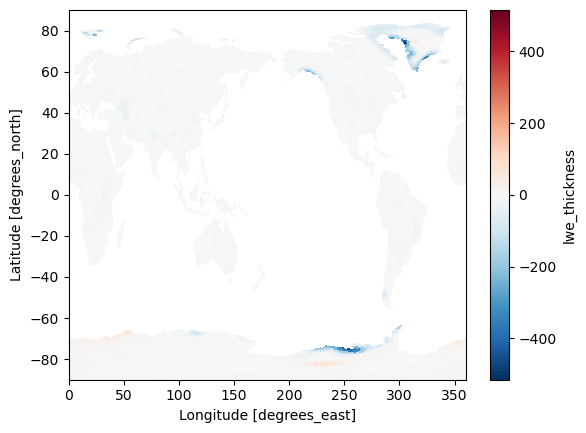

In [25]:
# Time mean
GraceCSR.lwe_thickness.where(GraceCSR.island == 1).mean(dim = 'time').plot()

# 3.2.3

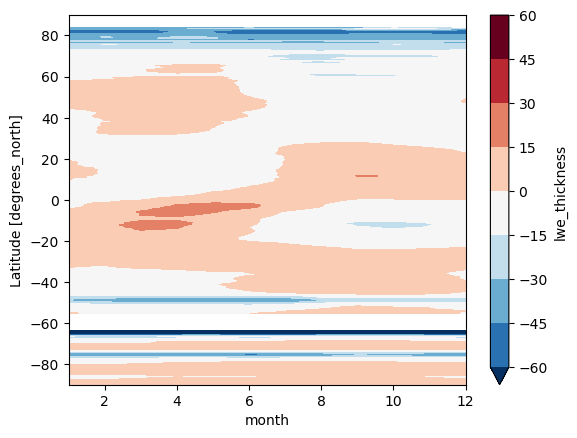

In [26]:
#vPlot zonal mean climatology for land
CSR_clim = GraceCSR.lwe_thickness.where(GraceCSR.island ==1).groupby('time.month').mean()

CSR_clim.mean(dim='lon').plot.contourf(x='month', 
                                       levels=10, robust = True)#vmin=-5, vmax=35)

# 3.2.4

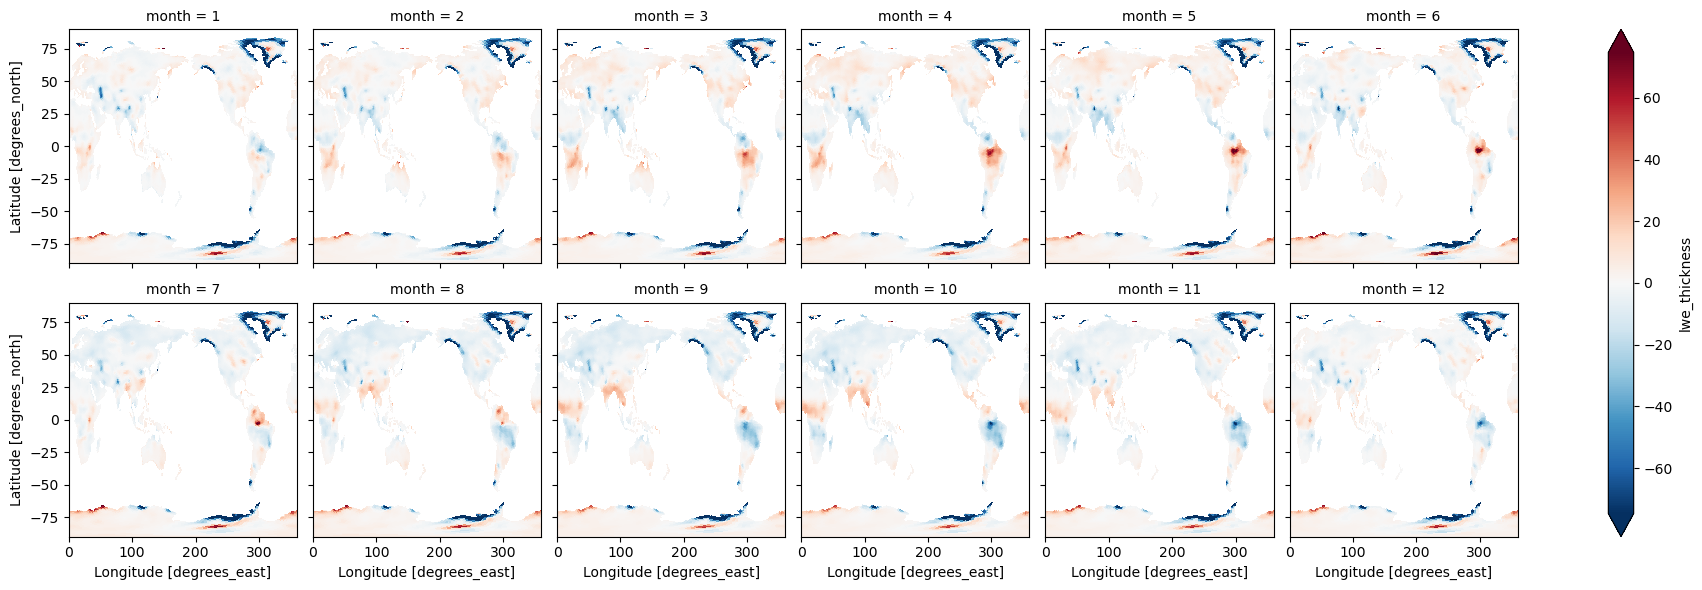

In [27]:
# Plot climatology
GraceCSR.lwe_thickness.where(GraceCSR.island ==1).groupby('time.month').mean(dim='time').plot(col="month", col_wrap=6,robust=True)

# 3.2.5

D:\ANACONDA\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
D:\ANACONDA\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


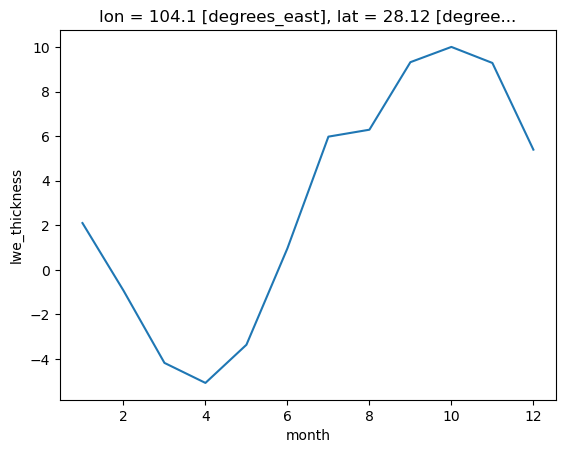

In [28]:
# Plot climatology at a specific point (My hometown Yibin)
CSR_clim.sel(lon=104, lat=28, method='nearest').plot()